In [2]:
!pip install http://download.pytorch.org/whl/cu92/torch-1.6.0-cp36-cp36m-linux_x86_64.whl
!pip install torchvision

In [83]:
import numpy as np
import torch as th

In [84]:
x = np.linspace(0, 4, 5)
y = 3. * x + - 1.5

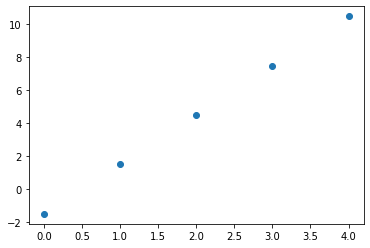

In [85]:
import matplotlib.pyplot as plt
plt.scatter(x, y)

In [86]:
x = th.tensor(x, requires_grad=True)
y = th.tensor(y, requires_grad=True)

In [87]:
class LinearRegressionModel(th.nn.Module): 
  
    def __init__(self): 
        super(LinearRegressionModel, self).__init__() 
        self.m = th.nn.parameter.Parameter(th.tensor(np.ones((1,))), requires_grad=True)
        self.c = th.nn.parameter.Parameter(th.tensor(np.ones((1,)), requires_grad=True), requires_grad=True)
  
    def forward(self, x): 
        y_pred = x * self.m + self.c
        return y_pred 

In [88]:
l = LinearRegressionModel()

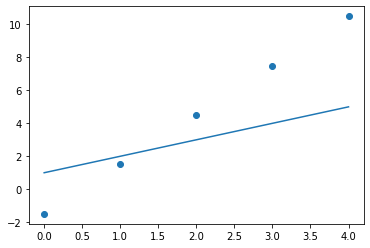

In [89]:
y_pred = l(x)
plt.scatter(x.detach().numpy(), y.detach().numpy())
plt.plot(x.detach().numpy(), y_pred.detach().numpy())

In [90]:
for name, param in l.named_parameters():
    if param.requires_grad:
        print(name, param.data)

m tensor([1.], dtype=torch.float64)
c tensor([1.], dtype=torch.float64)


In [99]:
lr = 0.01
optimizer = th.optim.SGD(l.parameters(), lr=lr) 
for i in range(100):
  y_pred = l(x)
  loss = th.square(y - y_pred).mean()
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  print(loss, lr)

tensor(1.1379, dtype=torch.float64, grad_fn=<MeanBackward0>) 0.01
tensor(1.1244, dtype=torch.float64, grad_fn=<MeanBackward0>) 0.01
tensor(1.1110, dtype=torch.float64, grad_fn=<MeanBackward0>) 0.01
tensor(1.0978, dtype=torch.float64, grad_fn=<MeanBackward0>) 0.01
tensor(1.0847, dtype=torch.float64, grad_fn=<MeanBackward0>) 0.01
tensor(1.0718, dtype=torch.float64, grad_fn=<MeanBackward0>) 0.01
tensor(1.0591, dtype=torch.float64, grad_fn=<MeanBackward0>) 0.01
tensor(1.0464, dtype=torch.float64, grad_fn=<MeanBackward0>) 0.01
tensor(1.0340, dtype=torch.float64, grad_fn=<MeanBackward0>) 0.01
tensor(1.0217, dtype=torch.float64, grad_fn=<MeanBackward0>) 0.01
tensor(1.0095, dtype=torch.float64, grad_fn=<MeanBackward0>) 0.01
tensor(0.9975, dtype=torch.float64, grad_fn=<MeanBackward0>) 0.01
tensor(0.9856, dtype=torch.float64, grad_fn=<MeanBackward0>) 0.01
tensor(0.9739, dtype=torch.float64, grad_fn=<MeanBackward0>) 0.01
tensor(0.9623, dtype=torch.float64, grad_fn=<MeanBackward0>) 0.01
tensor(0.9

In [100]:
for name, param in l.named_parameters():
    if param.requires_grad:
        print(name, param.data)

m tensor([2.6448], dtype=torch.float64)
c tensor([-0.4874], dtype=torch.float64)


In [101]:
th.square(y - y_pred).mean()

tensor(0.3478, dtype=torch.float64, grad_fn=<MeanBackward0>)

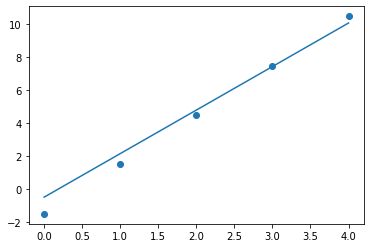

In [102]:
plt.scatter(x.detach().numpy(), y.detach().numpy())
plt.plot(x.detach().numpy(), y_pred.detach().numpy())